In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kendalltau, spearmanr, pearsonr
import search_results_lib as srl
import json

In [2]:
countries = [
    "Argentina",
    "Bolivia",
    "Chile",
    "Colombia",
    "Costa Rica",
    "Cuba",
    "Ecuador",
    "El Salvador",
    "Guatemala",
    "Honduras",
    "Mexico",
    "Nicaragua",
    "Panama",
    "Paraguay",
    "Peru",
    #"Puerto Rico",
    "Dominican Republic",
    "Uruguay",
    "Venezuela",
    "Spain"
]
n_countries = len(countries)
print(n_countries)  # 20
countries.sort()
corr_dict = {}

19


# Indices de corrupcion

In [3]:
path = "./indices/datasets/CPI2024-Results-and-trends.csv"
df_index = pd.read_csv(path, header=2, encoding="ISO-8859-1", sep=';')
df_index = df_index[df_index["Country / Territory"].isin(countries)]
df_index.dropna(how="all", axis=1, inplace=True)
df_index.rename(columns={"Country / Territory": "country"}, inplace=True)
df_index.set_index('country', inplace=True)

cpi2024_sources = {
    "rank": "Rank",
    "cpi": "CPI 2024 score",
    "gi": "S&P / Global Insights Country Risk Ratings",
    "prs": "PRS International Country Risk Guide",
    "vdem": "Varieties of Democracy Project",
    "wef": "World Economic Forum EOS",
    "wjp": "World Justice Project Rule of Law Index",
    "bti": "Bertelsmann Foundation Transformation Index",
    "eiu": "Economist Intelligence Unit Country Ratings"
}
df_index.rename(columns=dict(zip(cpi2024_sources.values(), cpi2024_sources.keys())), inplace=True)

df_index.drop(columns=[i for i in df_index.columns if i not in cpi2024_sources.keys()], inplace=True)
df_index = df_index.reindex(countries)
df_index.dropna(how='all', inplace=True)
df_index.sort_index(inplace=True)
df_index

,cpi,rank,bti,eiu,gi,prs,vdem,wef,wjp
country,,,,,,,,,
Argentina,37,99,51.0,51.0,32.0,33.0,48.0,18.0,44.0
Bolivia,28,133,39.0,35.0,32.0,33.0,34.0,6.0,18.0
Chile,63,32,82.0,67.0,59.0,60.0,70.0,58.0,64.0
Colombia,39,92,47.0,51.0,46.0,33.0,48.0,29.0,38.0
Costa Rica,58,42,73.0,67.0,59.0,42.0,62.0,43.0,60.0
Cuba,41,82,39.0,51.0,32.0,49.0,35.0,NaN,NaN
Dominican Republic,36,104,43.0,51.0,32.0,24.0,32.0,37.0,32.0
Ecuador,32,121,47.0,35.0,32.0,33.0,30.0,17.0,30.0
El Salvador,30,130,30.0,35.0,32.0,33.0,27.0,23.0,31.0


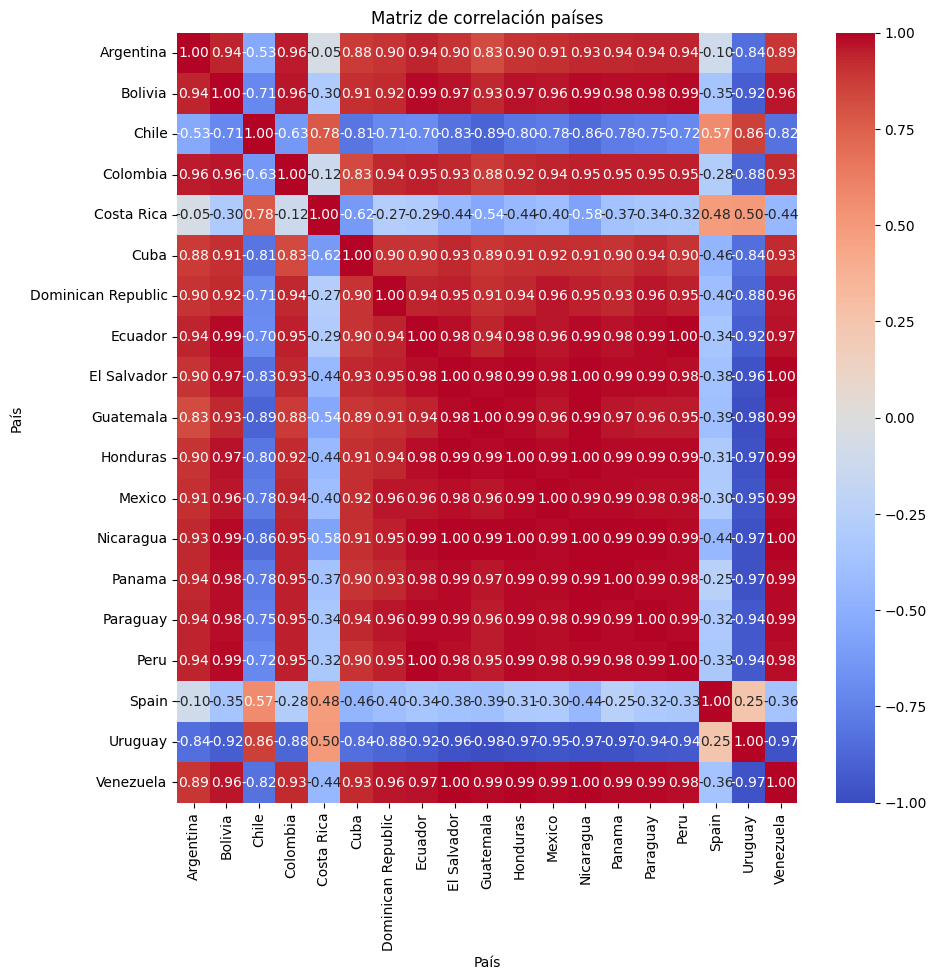

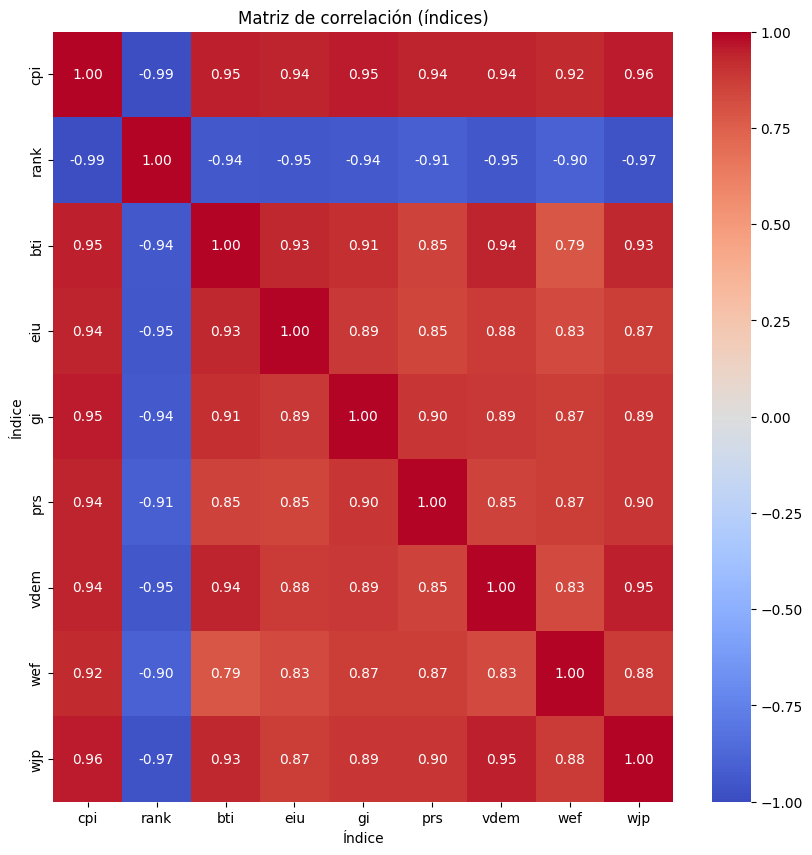

In [4]:
corr_dict['index'] = df_index.T.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_dict['index'], annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
#sns.heatmap(np.abs(index_corr), annot=True, cmap="coolwarm", vmin=0, vmax=1, fmt=".1f")
plt.title("Matriz de correlación países")
plt.xlabel("País")
plt.ylabel("País")
plt.show()

#corrT = correlation(df_index.T)

corr_dict['index-index'] = df_index.corr()

plt.figure(figsize=(10,10))
#sns.heatmap(index_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
sns.heatmap(corr_dict['index-index'], annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Matriz de correlación (índices)")
plt.xlabel("Índice")
plt.ylabel("Índice")
plt.show()

# Rankings resultados de busqueda

In [5]:
# Leer el archivo JSON guardado
Nombre_Archivo = f"./buscador/resultados/resultados_corrupcion.json"

with open(Nombre_Archivo, "r") as file:
    resultados = json.load(file)
for i in range(len(resultados)):
    if resultados[i]['country'] == 'Puerto Rico':
        resultados.pop(i)
        break
resultados.sort(key=lambda x: x['country'])

# Leer el archivo JSON guardado
Nombre_Archivo = f"./buscador/resultados/res_unicos_corrupcion.json"

with open(Nombre_Archivo, "r") as file:
    all_hrefs = json.load(file)

max_len = max([len(r['search_results']['results']) for r in resultados])
rankings = {}
for r in resultados:
    pages = [all_hrefs.index(res['href']) for res in r['search_results']['results']]
    if len(pages) < max_len:
        diff = max_len - len(pages)
        pages += [np.nan] * diff
    rankings[r['country']] = pages
df_rankings = pd.DataFrame(rankings).T
df_rankings.sort_index(inplace=True)
df_rankings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Argentina,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0
Bolivia,0.0,1.0,3.0,5.0,2.0,4.0,28.0,100.0,55.0,101.0,...,153.0,154.0,155.0,97.0,156.0,157.0,65.0,158.0,59.0,NaN
Chile,1.0,4.0,159.0,160.0,3.0,2.0,5.0,33.0,161.0,144.0,...,51.0,208.0,116.0,209.0,125.0,210.0,211.0,212.0,139.0,82.0
Colombia,0.0,1.0,3.0,2.0,4.0,5.0,28.0,8.0,119.0,43.0,...,266.0,75.0,144.0,132.0,124.0,146.0,267.0,131.0,86.0,268.0
Costa Rica,1.0,3.0,2.0,4.0,5.0,158.0,28.0,269.0,270.0,271.0,...,137.0,59.0,82.0,125.0,155.0,298.0,299.0,300.0,NaN,NaN
Cuba,0.0,1.0,2.0,3.0,4.0,5.0,28.0,55.0,43.0,8.0,...,315.0,30.0,299.0,141.0,153.0,316.0,32.0,101.0,NaN,NaN
Dominican Republic,0.0,1.0,3.0,2.0,4.0,5.0,106.0,120.0,28.0,527.0,...,300.0,475.0,79.0,361.0,127.0,344.0,143.0,155.0,31.0,312.0
Ecuador,1.0,3.0,159.0,5.0,317.0,2.0,4.0,63.0,318.0,319.0,...,68.0,136.0,353.0,96.0,138.0,58.0,153.0,NaN,NaN,NaN
El Salvador,0.0,1.0,2.0,3.0,4.0,5.0,28.0,354.0,55.0,43.0,...,143.0,158.0,138.0,140.0,209.0,53.0,314.0,77.0,362.0,203.0
Guatemala,0.0,1.0,2.0,3.0,5.0,4.0,49.0,116.0,28.0,294.0,...,285.0,382.0,312.0,146.0,51.0,131.0,383.0,166.0,360.0,384.0


In [6]:
for i in resultados:
    print(i['country'])

Argentina
Bolivia
Chile
Colombia
Costa Rica
Cuba
Dominican Republic
Ecuador
El Salvador
Guatemala
Honduras
Mexico
Nicaragua
Panama
Paraguay
Peru
Spain
Uruguay
Venezuela


# Matriz de distancia entre capitales

In [7]:
capital_coords = {
    "Argentina": (-34.6037, -58.3816),            # Buenos Aires
    "Bolivia": (-16.4897, -68.1193),              # La Paz (sede de gobierno)
    "Chile": (-33.4489, -70.6693),                 # Santiago
    "Colombia": (4.7110, -74.0721),                # Bogotá
    "Costa Rica": (9.9281, -84.0907),              # San José
    "Cuba": (23.1136, -82.3666),                   # La Habana
    "Ecuador": (-0.1807, -78.4678),                # Quito
    "El Salvador": (13.6929, -89.2182),            # San Salvador
    "Guatemala": (14.6349, -90.5061),              # Ciudad de Guatemala
    "Honduras": (14.0723, -87.1921),               # Tegucigalpa
    "Mexico": (19.4326, -99.1332),                 # Ciudad de México
    "Nicaragua": (12.1140, -86.2362),              # Managua
    "Panama": (8.9824, -79.5199),                  # Ciudad de Panamá
    "Paraguay": (-25.2637, -57.5759),              # Asunción
    "Peru": (-12.0464, -77.0428),                  # Lima
    #"Puerto Rico": (18.4655, -66.1057),            # San Juan
    "Dominican Republic": (18.4861, -69.9312),     # Santo Domingo
    "Uruguay": (-34.9011, -56.1645),               # Montevideo
    "Venezuela": (10.4806, -66.9036),              # Caracas
    "Spain": (40.4168, -3.7038)                    # Madrid
}

D = np.zeros((n_countries, n_countries), dtype=float)

for i, ci in enumerate(countries):
    for j, cj in enumerate(countries):
        if i == j:
            D[i, j] = 0.0
        else:
            D[i, j] = srl.haversine_km(capital_coords[ci], capital_coords[cj])

# DataFrame cuadrado país x país (normalizado 0..1)
corr_dict['distances'] = pd.DataFrame(D/D.max(), index=countries, columns=countries)
corr_dict['distances']

,Argentina,Bolivia,Chile,Colombia,Costa Rica,Cuba,Dominican Republic,Ecuador,El Salvador,Guatemala,Honduras,Mexico,Nicaragua,Panama,Paraguay,Peru,Spain,Uruguay,Venezuela
Argentina,0.000000,0.208884,0.106421,0.436413,0.527375,0.644683,0.563288,0.407404,0.586834,0.601879,0.580192,0.690724,0.557697,0.498319,0.097313,0.293159,0.938599,0.019177,0.475894
Bolivia,0.208884,0.000000,0.177817,0.228609,0.319833,0.436198,0.363872,0.199874,0.381119,0.396643,0.373023,0.489514,0.350660,0.289447,0.136945,0.100993,0.856755,0.221200,0.280501
Chile,0.106421,0.177817,0.000000,0.397893,0.469823,0.598986,0.539656,0.353945,0.523156,0.536891,0.520194,0.617647,0.497864,0.449454,0.145706,0.230461,1.000000,0.125480,0.457947
Colombia,0.436413,0.228609,0.397893,0.000000,0.116575,0.208529,0.149168,0.068297,0.181062,0.197184,0.165838,0.296273,0.146708,0.071599,0.353145,0.176794,0.748609,0.447272,0.095074
Costa Rica,0.527375,0.319833,0.469823,0.116575,0.000000,0.138064,0.167913,0.120046,0.065178,0.081429,0.053357,0.180385,0.031536,0.047864,0.453559,0.239630,0.792649,0.540678,0.175822
Cuba,0.644683,0.436198,0.598986,0.208529,0.138064,0.000000,0.129930,0.245213,0.118866,0.118942,0.105244,0.166666,0.120515,0.149533,0.561219,0.369306,0.695206,0.655775,0.201867
Dominican Republic,0.563288,0.363872,0.539656,0.149168,0.167913,0.129930,0.000000,0.212627,0.198743,0.208640,0.178053,0.286779,0.176177,0.138166,0.471416,0.325498,0.625708,0.571101,0.088568
Ecuador,0.407404,0.199874,0.353945,0.068297,0.120046,0.245213,0.212627,0.000000,0.181711,0.197489,0.173156,0.293000,0.150787,0.095825,0.334509,0.124158,0.816429,0.420632,0.162935
El Salvador,0.586834,0.381119,0.523156,0.181062,0.065178,0.118866,0.198743,0.181711,0.000000,0.016252,0.020813,0.115301,0.034367,0.110225,0.516219,0.295380,0.808345,0.600858,0.229057
Guatemala,0.601879,0.396643,0.536891,0.197184,0.081429,0.118942,0.208640,0.197489,0.016252,0.000000,0.033866,0.099113,0.050483,0.126174,0.531976,0.309924,0.812255,0.616056,0.243085


# Evaluaciones de cuestionario

In [8]:
df_responses = pd.read_csv("./buscador/responses.csv", sep='\t', header=0)
df_responses[df_responses['pagina'] == 12]

multi_choice = ['proposito',
                'informacion_presentada',
                'consecuencias',
                'intencion',
                'localidad_problema',
                'involucrados',
                'emociones']

possible_answers = {"tipo_entidad": ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'],
                    "origen_entidad": ['a', 'b'],
                    "vision": ['a', 'b', 'c', 'd'],
                    'que_muestra': ['a', 'b', 'c', 'd'],
                    'formalidad': ['a', 'b'],
                    'nivel_educacion': ['a', 'b'],
                    'tono': ['a', 'b'],
                    "proposito": ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'],
                    "informacion_presentada": ['a', 'b', 'c'],
                    "consecuencias": ['a', 'b', 'c', 'd'],
                    "intencion": ['a', 'b', 'c', 'd', 'e', 'f'],
                    "localidad_problema": ['a', 'b', 'c'],
                    "involucrados": ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'],
                    "emociones": ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
                    }
single_questions = [q for q in possible_answers if q not in multi_choice]

# humano < 75% precision llama < 0.6
bad_questions = ['proposito__d', 'tono', 'intencion__c', 'que_muestra', 'proposito__g', 'consecuencias__c', 'proposito__b', 'involucrados__f', 'emociones__h', 'formalidad', 'involucrados__b', 'localidad_problema__a']
# humano < 75% precision llama <= 0.6
#bad_questions = ['proposito__d', 'tono', 'intencion__c', 'que_muestra', 'proposito__g', 'consecuencias__c', 'proposito__b', 'involucrados__f', 'origen_entidad', 'intencion__b', 'emociones__h', 'vision', 'intencion__a', 'formalidad', 'involucrados__b', 'tipo_entidad', 'localidad_problema__a', 'localidad_problema__b']
#bad_questions.remove('emociones__h') # se elimina emocion neutral
for q in bad_questions:
    if "__" not in q:
        bad_questions.remove(q)
        for i in possible_answers.get(q, []):
            bad_questions.append(f"{q}__{i}")

df_pag_info = srl.analyze_pages(df_responses, multi_choice, possible_answers)
df_pag_info = df_pag_info.drop(columns=bad_questions)
one_hot_cols = [col for col in df_pag_info.columns if df_pag_info[col].isin([0, 1]).all()]
df_pag_info

,nivel_educacion__a,nivel_educacion__b,origen_entidad__a,origen_entidad__b,tipo_entidad__a,tipo_entidad__b,tipo_entidad__c,tipo_entidad__d,tipo_entidad__e,tipo_entidad__f,...,involucrados__e,involucrados__g,involucrados__h,emociones__a,emociones__b,emociones__c,emociones__d,emociones__e,emociones__f,emociones__g
pagina,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0,1,0,1,0,0,0,0,0,0,...,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.333333,0.000000,0.000000
2,0,1,0,1,0,0,0,0,0,0,...,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.333333,0.000000
3,0,1,0,1,0,0,1,0,0,0,...,0.333333,0.000000,0.333333,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0,1,0,1,0,0,0,0,0,0,...,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,0,1,1,0,0,0,0,1,0,0,...,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.333333,0.000000,0.333333
593,0,1,0,1,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.333333,0.333333
594,0,1,1,0,0,1,0,0,0,0,...,0.333333,0.000000,0.333333,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.666667


# Robertuito

In [12]:
bad_labels = ['emotion_others', 'sentiment_NEU', 'irony_not ironic']
df_robertuito = pd.read_csv("./buscador/robertuito/robertuito_all_results.csv").drop(columns=bad_labels)
df_robertuito.set_index('pagina', inplace=True)

df = df_robertuito.copy()
df.columns = (
    pd.Index(df.columns)
    .astype(str)
    .str.extract(r"(\d+)", expand=False)
    .astype(int)
)
# si eran 0..99, pásalos a 1..100
if df.columns.min() == 0:
    df.columns = df.columns + 1

df_robertuito = df


df_robertuito

ValueError: cannot convert float NaN to integer

In [13]:
col_s = pd.Index(df_robertuito.columns).astype(str)
bad = col_s[col_s.str.extract(r"(\d+)", expand=False).isna()]
print("Columnas sin dígitos:", list(bad)[:50])
print("Total:", len(bad))


Columnas sin dígitos: ['emotion_joy', 'emotion_sadness', 'emotion_anger', 'emotion_fear', 'emotion_surprise', 'emotion_disgust', 'sentiment_NEG', 'sentiment_POS', 'hate_speech_hateful', 'hate_speech_targeted', 'hate_speech_aggressive', 'irony_ironic']
Total: 12


# Comparacion de resultados

In [ ]:
df_dict = {
    "index": df_index,
    "rankings": df_rankings,
    "page_info": df_pag_info,
    "robertuito": df_robertuito
}

segmentation = 10

method = "kendall"

all_results = []
for top in [10, 20, 50, 100]:
    # orden de rankings
    corr_dict['order'], p, _ = srl.results_order_correlation(resultados, all_hrefs, top, method=method, absent_policy="1.5top")
    
    # valoracion de segmentos de rankings
    # formulario
    corr_dict['eval'], _ = srl.compute_rank_feature_distance(df_dict['rankings'], df_dict['page_info'], segment_size=segmentation, onehot_cols=one_hot_cols)
    # robertuito
    corr_dict['robertuito'], _ = srl.compute_rank_feature_distance(df_dict['rankings'], df_dict['robertuito'], segment_size=segmentation)

    rand = np.random.rand(n_countries, n_countries)
    rand = (rand + rand.T) / 2  # simétrica
    np.fill_diagonal(rand, 1.0)
    corr_dict['random'] = pd.DataFrame(rand, index=countries, columns=countries)

    # vectorizar matrices (solo triangular superior, sin diagonal)
    vect_dict = {k: srl.upper_tri_vals(corr_dict[k]) for k in corr_dict if k != 'index-index'}

    rp_dict = {}
    titles = []
    # correlación entre evaluación y otras matrices
    for source in ["eval", 'index', 'robertuito']:
        rp_dict.update({source+'-'+k: spearmanr(vect_dict[source], vect_dict[k]) for k in vect_dict if k not in [source, 'index-index']})
    rp_dict.pop('index-eval') 
    
    results = pd.DataFrame({
        "comparacion": rp_dict.keys(),
        "r": [rp_dict[k][0] for k in rp_dict],
        "p": [rp_dict[k][1] for k in rp_dict],
        "top": top
    })
    results = results.round(3)

    all_results.append(results)

    print("=" * 50)
    print(f"Top {top} resultados:")
    print("-" * 50)
    print(results)
    print("=" * 50+'\n')


# Combinar resultados de todos los tops
df_all = pd.concat(all_results, ignore_index=True)
df_all["comparacion"] = pd.Categorical(df_all["comparacion"], categories=rp_dict.keys())
#print(df_all)
# Pivot para los coeficientes de correlación (r)
wide_r = df_all.pivot(index="top", columns="comparacion", values="r").sort_index()
#print(wide_r)
# Pivot para los p-values
wide_p = df_all.pivot(index="top", columns="comparacion", values="p").sort_index()
#print(wide_p)

cols = wide_r.columns  # o wide_p.columns; idealmente iguales
style_map = srl.build_style_map(cols)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Figura para r
ax1 = srl.plot_wide(wide_r, title=r"Correlación ($\rho$) vs top", ylab=r"$\rho$", style_map=style_map, ylim=(-1, 1), ax=axes[0], show_legend=False)

# Figura para p
ax2 = srl.plot_wide(wide_p, title="p-value vs top", ylab="p", style_map=style_map, log_scale=True, ax=axes[1])
plt.show()

rank_long: (1900, 3)
merged: (1900, 53)
seg: (190, 51)
feature_cols: 49 ['nivel_educacion__a', 'nivel_educacion__b', 'origen_entidad__a', 'origen_entidad__b', 'tipo_entidad__a', 'tipo_entidad__b', 'tipo_entidad__c', 'tipo_entidad__d', 'tipo_entidad__e', 'tipo_entidad__f']
segmento unique: 10
rank_long: (0, 3)
merged: (0, 53)
seg: (0, 51)
feature_cols: 49 ['nivel_educacion__a', 'nivel_educacion__b', 'origen_entidad__a', 'origen_entidad__b', 'tipo_entidad__a', 'tipo_entidad__b', 'tipo_entidad__c', 'tipo_entidad__d', 'tipo_entidad__e', 'tipo_entidad__f']
segmento unique: 0


ValueError: at least one array or dtype is required

Top 10 resultados:
--------------------------------------------------
       comparacion      r      p  top
0       eval-index -0.094  0.223   10
1   eval-distances  0.216  0.004   10
2       eval-order -0.206  0.007   10
3      eval-random  0.045  0.558   10
4  index-distances -0.379  0.000   10
5      index-order  0.212  0.005   10
6     index-random  0.052  0.501   10

Top 20 resultados:
--------------------------------------------------
       comparacion      r      p  top
0       eval-index -0.094  0.223   20
1   eval-distances  0.216  0.004   20
2       eval-order -0.388  0.000   20
3      eval-random  0.104  0.176   20
4  index-distances -0.379  0.000   20
5      index-order  0.193  0.012   20
6     index-random  0.010  0.900   20

Top 50 resultados:
--------------------------------------------------
       comparacion      r      p  top
0       eval-index -0.094  0.223   50
1   eval-distances  0.216  0.004   50
2       eval-order -0.751  0.000   50
3      eval-random -0.092  0

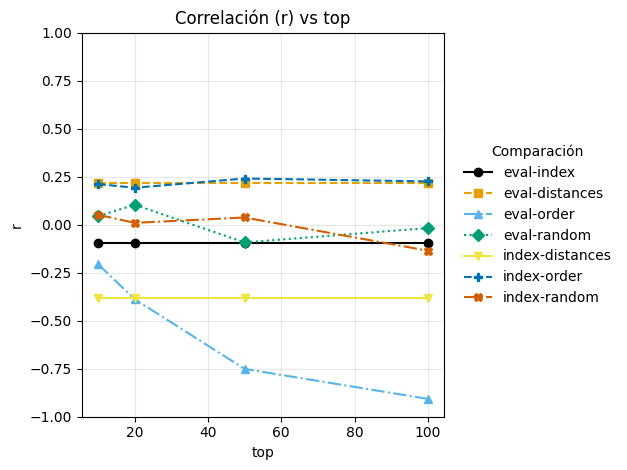

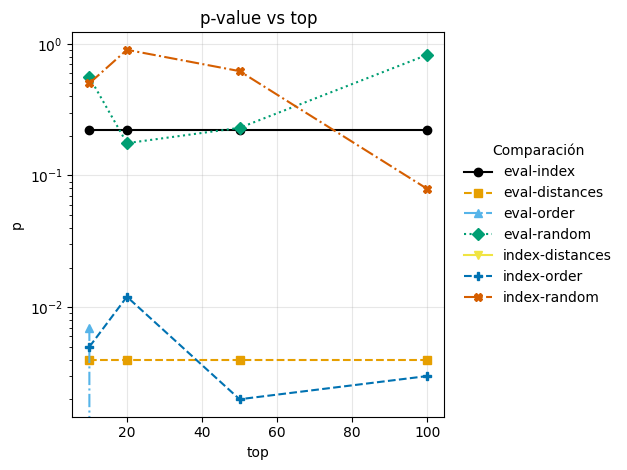

In [ ]:
df_dict = {
    "index": df_index,
    "rankings": df_rankings,
    "page_info": df_pag_info,
    "robertuito": df_robertuito
}

segmentation = 20

method = "kendall"

all_results = []
for top in [10, 20, 50, 100]:
    # orden de rankings
    corr_dict['order'], p, _ = srl.results_order_correlation(resultados, all_hrefs, top, method=method, absent_policy="1.5top")
    
    # valoracion de segmentos de rankings
    corr_dict['eval'], _ = srl.compute_rank_feature_distance(df_dict['rankings'], df_dict['page_info'], segment_size=segmentation, onehot_cols=one_hot_cols)

    rand = np.random.rand(n_countries, n_countries)
    rand = (rand + rand.T) / 2  # simétrica
    np.fill_diagonal(rand, 1.0)
    corr_dict['random'] = pd.DataFrame(rand, index=countries, columns=countries)

    # vectorizar matrices (solo triangular superior, sin diagonal)
    vect_dict = {k: srl.upper_tri_vals(corr_dict[k]) for k in corr_dict if k != 'index-index'}

    rp_dict = {}
    titles = []
    # correlación entre evaluación y otras matrices
    for source in ["eval", 'index']:
        rp_dict.update({source+'-'+k: spearmanr(vect_dict[source], vect_dict[k]) for k in vect_dict if k not in [source, 'index-index']})
    rp_dict.pop('index-eval') 
    
    results = pd.DataFrame({
        "comparacion": rp_dict.keys(),
        "r": [rp_dict[k][0] for k in rp_dict],
        "p": [rp_dict[k][1] for k in rp_dict],
        "top": top
    })
    results = results.round(3)

    all_results.append(results)

    print("=" * 50)
    print(f"Top {top} resultados:")
    print("-" * 50)
    print(results)
    print("=" * 50+'\n')


# Combinar resultados de todos los tops
df_all = pd.concat(all_results, ignore_index=True)
df_all["comparacion"] = pd.Categorical(df_all["comparacion"], categories=rp_dict.keys())
#print(df_all)
# Pivot para los coeficientes de correlación (r)
wide_r = df_all.pivot(index="top", columns="comparacion", values="r").sort_index()
#print(wide_r)
# Pivot para los p-values
wide_p = df_all.pivot(index="top", columns="comparacion", values="p").sort_index()
#print(wide_p)

cols = wide_r.columns  # o wide_p.columns; idealmente iguales
style_map = srl.build_style_map(cols)

# Figura para r
ax1 = srl.plot_wide(wide_r, title="Correlación (r) vs top", ylab="r", style_map=style_map, ylim=(-1, 1))
plt.show()

# Figura para p
ax2 = srl.plot_wide(wide_p, title="p-value vs top", ylab="p", style_map=style_map, log_scale=True)
plt.show()